**POINT OF THIS NOTEBOOK IS TO CORRECT MISTAKES OF PREVIOUS NOTEBOOK USING LSTM:** 

**MISTAKES OF PREVIOUS NOTEBOOK:**

**1. OVERFITTING DUE TO LIMITED DATASIZE**

**2.  EXCESSIVE FEATURE EXTRACTION**

**3. HAVING WRONG PREDICTIONS DUE TO WRONG TYPE OF NORMALIZATION**

**4. NO HYPERPARAMTER TUNING**

**. TRYING TO PREDICT STOCK PRICES. WE FOUND OUT LSTMs ARE BETTER ARE DETECTING STOCK PRICE MOVEMENTS**

**THIS NOTEBOOK IS DEALING WITH ALL THESE PROBLEMS WITH THE FOLLOWING STEPS:**

**1.GETTING DATA FROM THE API AND SETTING UP COLAB**

**2. PLOTTING THE DATA**

**3. NORMALIZING THE DATA**

**4. FIND OUT MORE ABOUT THE DATA-EMA, MOVING AVERAGES, ONE STEP AHEAD PREDICTION**

**5. HYPERPARAMETER TUNING**

**6. CREATE AN AVERAGE PRICE AND USE THAT TO CREATE TRAINING AND TESTING DATA**

**7. TRAIN AN LSTM NETWORK**

**8. PLOT THE PREDICTIONS**

**9. EXPERIMENT AROUND WITH HYPERPARAMETERS, TRAINING AND SEE IF YOU ARE OVERFITTING OR UNDER FITTING**

**10. CONCLUSION**


**PART 1: SETTING UP COLAB.** 

In [0]:
#import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

This code includes several libraries and modules that are essential for analyzing and visualizing data, as well as for machine learning. The first library, pandas_datareader, allows us to collect financial information from various sources. The next library, matplotlib.pyplot, allows us to create visually appealing charts and graphs. Another library, pandas, helps with analyzing and manipulating data. The library datetime comes in handy when working with dates and times. To make HTTP requests, the library urllib.request is used. When dealing with JSON data, the library json is helpful. The library os allows us to interact with our operating system. For scientific calculations, the library numpy is used. For machine learning tasks, the library tensorflow is utilized. Finally, the library MinMaxScaler helps us scale data to prepare for machine learning models. All these libraries are imported so that we can effectively perform a variety of data analysis and machine learning tasks.

In [40]:
#declare name of your device and drive location select GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


This piece of code sets the name for the device and chooses where it will be stored. It then double checks to make sure the name for the graphics card is correct, and if it isnt, it will display an error message. Once that is done, it will let you know that a graphics card has been found at the chosen location. Basically, this code is used to see if a graphics card is ready to be used on the selected device and to let the person know where it is if it is found.

In [41]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


This piece of code uses the Google Colab library drive to connect and access the drive through the directory path /content/drive. It will automatically reconnect the drive each time the code is run.

**SO I THOUGHT OF USING GENERAL ELECTRIC(GE) DATA INSTEAD OF AMAZON FOR THIS RUN.**

**THE DATASET IS LARGER AND ITS EASIER TO OBSERVE THEIR PROGRESS FOR LONGER TIME THAN AMAZON.AMAZON HAS BEEN AROUND FOR NOT A LONG TIME SO IT GETS TOUGHER TO CORRELATE BETWEEN TESTING DATA AND TRAINING DATA.EXAMPLE** 

**IF I NEED 900 DATA SAMPLES FOR TRAINING ILL HAVE TO RUN TESTING ON 180 DAYS BUT THE RISE ON AMAZON HAS BEEN AROUND FOR 4 YEARS(IN ALL 1200 DAYS) TO THIS DATE SO DATA IS LIMITED ESPECIALLY FOR THIS KIND OF ONE DAY PREDICTION AND PRICE PATTERN PREDICTION**

**DATASET IS LARGER THIS TIME AROUND SO I DONT HAVE TO WORRY ABOUT OVERFITTING AND CAN FOCUS MORE ON THE TRAINING**



In [0]:
#name of your google path
googlepath = "/content/drive/My Drive"

This piece of code helps us keep track of a certain spot in our Google Drive. We call this spot My Drive. By doing this, we can easily find and use files that we have saved in that particular location. The rest of the code just gives a name to our spot and tells the computer what it represents. It doesnt do anything else. Its important because it makes our work in Google Drive easier and faster.

In [0]:
#Get your API data
df = pd.read_csv(os.path.join(f'{googlepath}','ge.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])

This program helps us get important information from a website. The df variable is what we will use to store this information in a neat and organized way. To start, we bring in the pandas library using the shortcut pd. This library is often used to analyze and work with data in Python. Our next step is to use the read_csv function from pandas, which lets us take data from a CSV file. When using this function, we have to specify two things: where the file is located, and how the data is separated. We do this using os.path.join, which combines the googlepath and ge.us.txt variables to create a file path, and by saying that the data is split by commas. Finally, we tell the program which parts of the CSV file we want to keep, which in this case are the columns with the Date, Open, High, Low, and Close information. The data is then saved in the df variable so that we can use it later for more analyzing and organizing. In summary, this code helps us fetch and arrange important data from a CSV file for future use.

In [44]:
df = df.sort_values('Date')
df.head()

Date     Open     High      Low    Close
0  1970-01-02  0.30627  0.30627  0.30627  0.30627
1  1970-01-05  0.30627  0.31768  0.30627  0.31385
2  1970-01-06  0.31385  0.31385  0.30996  0.30996
3  1970-01-07  0.31385  0.31385  0.31385  0.31385
4  1970-01-08  0.31385  0.31768  0.31385  0.31385

To simplify this computer language, the first line does a cool thing with a group of data called df. It puts this group in order based on the dates in the Date column. This means the dates can go from oldest to newest or newest to oldest. But dont worry, the actual data doesnt change, it just makes a new group thats already sorted. This new group is stored back in df and replaces the old group. The second line uses the head function on the df group to show the first five rows. This helps the user make sure the dates are in the right order without messing up the original group. So basically, these two lines make the dates in the group all organized and show a little peek of the new order.

**FIND AVERAGE PRICE OF THE HIGH AND LOW PRICES AND USE THAT TO PLOT.**

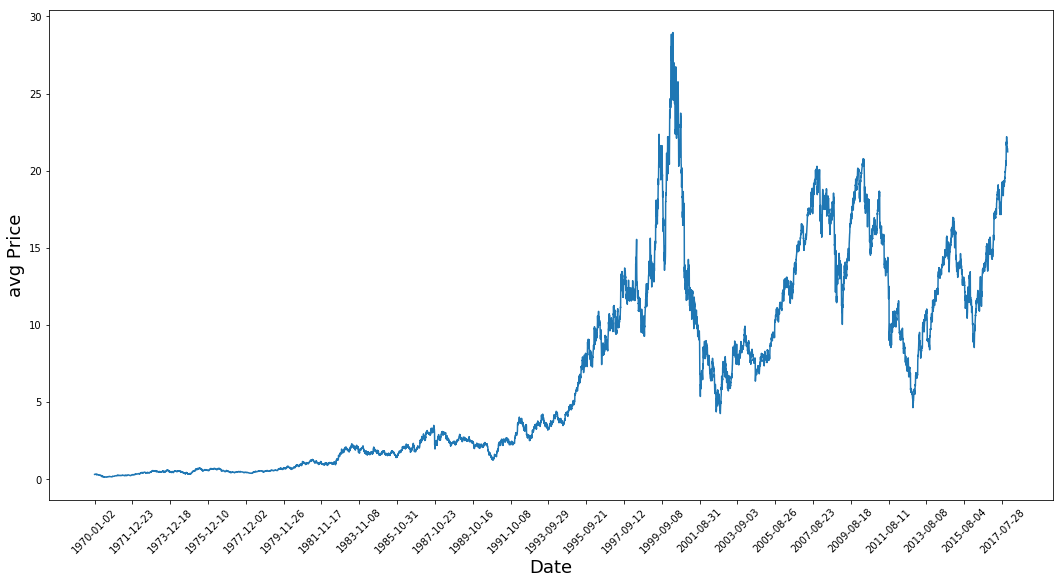

In [45]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.show()

This program first makes a new picture with a size of 18 by 9 using the plt.figure function. Then, it draws a line graph by finding the average of the Low and High numbers for each row in the table. To make it easier to read, the plt.xticks function is used to show only every 500th date from the Date column. The labels for the x-axis and y-axis are also made bigger, with a font size of 18. To improve the look, the label text is tilted at a 45 degree angle. Finally, the graph is shown using the plt.show function. In short, this code uses a visual picture to show how the average price of a financial thing changes over time.

In [46]:
# First calculate the average prices from the highest and lowest 
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
avg_prices = (high_prices+low_prices)/2.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


This program is finding the middle price from a set of data. It first looks for the column labeled High and puts that information into a collection called high_prices. Then, it does the same thing for the column labeled Low and stores that in a collection called low_prices. Next, the program adds up the numbers in both collections and divides them by 2 to get the average price. This average is then saved in a variable called avg_prices for future use. This process is repeated for each row of data, giving us an average price for each row. Overall, this program is finding the average price using the highest and lowest prices in the data and saving it for later use.

**OBSERVATIONS FROM THE PLOT:;**

**1. DATA PEAKS AROUND 1983 AND THEN GROWS UNTIL TWO CRASHES *ONE AROUND 2001(JUST AROUND 9/11 AND THE SECOND AROUND THE 2009 FINANCIAL MARKET CRASH.*.THIS IS REALLY INTERESTING!)**

**2. CALCULATING AVERAGE PRICES IS SOMEHOW NORMALIZING THE DATA AND GIVING A MUCH BETTER PICTURE THAN USING ONLY HIGH PRICES OR CLOSING PRICES SINCE IT GIVES AN IDEA ABOUT BUSINESS AROUND THE FULL DAY.**

**DATASET SIZE IS AROUND 12000 DATAPOINTS.** 

**SPLIT AVERAGE DATASET BETWEEN 11000 DATAPOINTS ARE IN TRAINING AND REST IN TESTING.**

**TRAINING DATASET IS  THEN NORMALIZED**

In [47]:
train = avg_prices[:11000]
test = avg_prices[11000:]
len(avg_prices)

12075

This code generates two fresh variables, train and test, which hold distinct components of another variable called avg_prices. The train variable comprises of the first 11000 elements from the avg_prices variable, while the test variable includes all the remaining elements. Later, the length of the avg_prices list is determined, which tells us the total number of items in it.

**START NORMALIZING DATA BY SCALING IT.**

**PROCESS OF NORMALIZATION:**

**1. CREATE  A WINDOW AND A USE THAT TO SMOOTHEN TTHE DATA POINTS'**

**2. USING A WINDOW OF 2500 FOR 10000 DATAPOINTS WOULD CREATE 4 DISTINCT DATAPOINTS**

**3. THE LAST NORMALIZATION SMOOTHS OVER THE REMAINING DATA POINTS**

**4. MinMaxScalar SCALES ALL THE  DATA TO BE IN THE REGION OF 0 AND 1.**

**You can also reshape the training and test data to be in the shape**


**PROCEDURE**

**Due to the observation you made earlier, that is, different time periods of data have different value ranges, you** **normalize the data by splitting the full series into windows. If you don't do this, the earlier data will be close to 0 and will not add much value to the learning process. Here you choose a window size of 2500.**

Ref: https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [0]:
scaler = MinMaxScaler() #use mimaxscaler from scikitlearn to normalize data
train = train.reshape(-1,1)
test = test.reshape(-1,1)


This code uses the MinMaxScaler function from the scikitlearn library to make sure the data is in a consistent format. First, the function is given the nickname scaler. Then, the information from the train and test datasets is adjusted so it only has one column, which makes it easier for the scaler to work with. The scaler function then uses this data to change the values so they all fall between 0 and 1. This is helpful when dealing with different datasets that have different value ranges because it makes sure all the data is on the same scale. Normalizing also helps when there are different units of measurement. Overall, the goal of this code is to make the data more comparable and easier to analyze.

**NORMALIZE AVERAGE PRICES AND TRY TO PREDICT BASED ON THEM INSTEAD OF FEATURE GENERATION**
**Length of data is 12075..we can normalize it using the sliding window technique.**

In [0]:
window_size = 2500
for x in range(0,10000,window_size):
    scaler.fit(train[x:x+window_size,:])
    train[x:x+window_size,:] = scaler.transform(train[x:x+window_size,:])

scaler.fit(train[x+window_size:,:])
train[x+window_size:,:] = scaler.transform(train[x+window_size:,:])

First, we set a variable called window_size and give it the number 2500. This variable will help us make separate groups of data that dont overlap. Then, we use a for loop to go through numbers from 0 to 10000, with each group being 2500 numbers apart. This gives us groups of data that are each 2500 numbers long. Inside the loop, we use a scaler tool to adjust and change a part of the training data. The scaler tool takes the average and standard deviation of the data in each group. Then, it changes the data by subtracting the average and dividing by the standard deviation for each column. We put this new, changed data back in the same place as the original data, replacing it. The loop goes through this process for each group of data until it has gone through all of the training data. This makes sure that we change all of the data, not just one group. In the last part of the code, we use the scaler again to change any remaining data in the training set that wasnt included in the previous groups. This means now all of the data has been changed the same way and is ready for us to do more with it.

In [0]:
# Reshape both train and test data
train = train.reshape(-1)

First, the code takes the variable train and applies the reshape method to it, using the argument -1. This modifies the arrangement of the information stored in the variable. By using -1 as the argument, the code can determine the appropriate arrangement without needing specific instructions, since it depends on the amount of information present. This is particularly helpful when dealing with datasets of different sizes. As a result, the variables content is changed for both the train and test data, making them easier to handle and compare for future data examination.

**make this into a 2d shape train**

In [0]:
# Normalize test data
test = scaler.transform(test).reshape(-1)

This piece of code works with a variable named test that supposedly holds some information. Next, it makes use of a method known as transform from an object referred to as scaler to alter the data in test. From what is understood, this scaler object helps make the data more uniform in some way, but the exact steps of this process are not specified. Once the alteration is complete, the outcome is reconfigured into a one-dimensional form using another method called reshape and then saved back into the variable test. This makes it easier to examine or carry out any additional actions on the standardized data. In summary, this code normalizes the test data and saves the changed version in the same variable.

**If you observe we never scale down the test data but instead just transform it and then reshape into the same shape of train data.** 
**You can now smooth the data using the exponential moving average. This helps you to get rid of the inherent raggedness of the data in stock prices and produce a smoother curve.**

**You should only smooth training data.**

Ref:https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well

# EMA averaging

In [0]:
EMA = 0.0 # keep EMA 0.0
ema2 = 0.1 # gamma is a variabe that can be multiplied with train 
for i in range(11000):
  EMA = ema2*train[i] + (1-ema2)*EMA
  train[i] = EMA

In this code, we are setting up EMA and ema2, which are used to calculate an exponentially weighted average. We are starting with a certain set of values for EMA and ema2. Then, with a for loop, we are going through each element in train represented by i and calculating a new value for EMA. This new value takes into account the original value of EMA, as well as the value of gamma, which we can adjust. After each calculation, the loop continues to the next element, updating the overall EMA as it goes. Finally, we update the train array with the new EMA values, giving us a complete array of updated averages for the original data. Essentially, this code helps us find a more accurate average for the data in train.

In [0]:
# Used for visualization and test purposes
all_avg_data = np.concatenate([train,test],axis=0)

This code helps combine two arrays, train and test, and create a new array called all_avg_data. The function used for this is concatenate, and it comes from the numpy library, which is used for doing math and science in Python. The goal of making this new array is to examine and experiment with something, possibly information or data from the original arrays. The axis=0 determines that the two arrays will be combined in the first row, so the new array will have the same columns as the original arrays combined. This code doesnt show any results, it simply makes a new array with the merged data for later use.

# One-Step Ahead Prediction via Averaging

What is One Step Ahead Prediction? 

Generally, time series forecasting describes predicting the observation at the next time step.

This is called a one-step forecast, as only one time step is to be predicted.

Mathematics behind it:

One step ahead prediction is prediction of one more day if past series values are give. In our case we average all the data and then try finding the next day's average value. To find this we train the data and find te pattern to get an output y. 
This process goes on for as  long as you select your training data.

Averaging mechanisms allow you to predict (often one time step ahead) by representing the future stock price as an average of the previously observed stock prices. Doing this for more than one time step can produce quite bad results. You will look at two averaging techniques below; standard averaging and exponential moving average. You will evaluate both qualitatively (visual inspection) and quantitatively (Mean Squared Error) the results produced by the two algorithms.

The Mean Squared Error (MSE) can be calculated by taking the Squared Error between the true value at one step ahead and the predicted value and averaging it over all the predictions.


Ref: https://machinelearningmastery.com/multi-step-time-series-forecasting/



**Simple Averaging:**

You can understand the difficulty of this problem by first trying to model this as an average calculation problem. First you will try to predict the future stock market prices (for example, xt+1) as an average of the previously observed stock market prices within a fixed size window (for example, xt-N, ..., xt) (say previous 100 days). Thereafter you will try a bit more fancier "exponential moving average" method and see how well that does. Then you will move on to the "holy-grail" of time-series prediction; Long Short-Term Memory models.

First you will see how normal averaging works. That is you say,
![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1525377205/sum_formula.png)

In other words, you say the prediction at t+1 is the average value of all the stock prices you observed within a window of t to t−N.

Ref: https://data36.com/statistical-averages-mean-median-mode/

In [54]:
window_size = 100 # chose standard window size of 100
N = train.size
mse_err = []
_avg_pred = [] #create a list for average x, predictions and mse errors
_avg_x = []

for idx1 in range(window_size,N): #make a for loop where if the value is greater than size then use timedelta function for that 1 day
    
    if idx1 >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[idx1,'Date']  #if not just find that value in the dataframe for the data and put it in date
        
    _avg_pred.append(np.mean(train[idx1-window_size:idx1])) #Keep apending values into into the lists
    mse_err.append((_avg_pred[-1]-train[idx1])**2)   #calculate mse errors
    _avg_x.append(date) #this is the x train for averages we will use to train 

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_err)))

MSE error for standard averaging: 0.00418


This piece of code is designed to figure out Mean Square Error MSE for a machine learning program. The first line determines a window size of 100. Then, the variable N is set to represent the number of data points in the training dataset. Next, three lists are made to hold the average x values, predictions, and MSE errors. The for loop goes through each data point in the training set, starting from the window size and going all the way to the end. During each iteration, it checks if the current index is the same or higher than the total number of data points. If it is, it uses the timedelta function to add one day to the current date. If not, it assigns the current dates value to the date variable. The next line adds the average of the previous data points to the avg_pred list. Then it calculates the MSE error by taking the difference between the current average prediction and the actual value, squaring it, and adding it to the mse_err list. Finally, the loop adds the current date to the avg_x list. As a final step, the code shows the MSE error, calculated through the standard averaging formula, which multiplies the average of squared errors by 0.5. Ultimately, this code measures MSE for a machine learning program using a window size of 100.

for range from 100 to size of train(11000) create the training data dates and then find their mean and append them to average predictions
else: 
make a test set and then append all this to std_avg(all dates in this)
and:
calculate the mse_err

The above method is super awesome to calculate simple or standard averages. It uses timedelta to mainpulate date and push the date back to 1 day and add it to date along with datetime which strups the date and time from the given format. 

The above code will execute only when idx1 is greater than size(so all testing data is stored differently and training data is different)

Ref: https://machinelearningmastery.com/normalize-standardize-time-series-data-python/


MSE error is great! Very less just as we were expecting. 

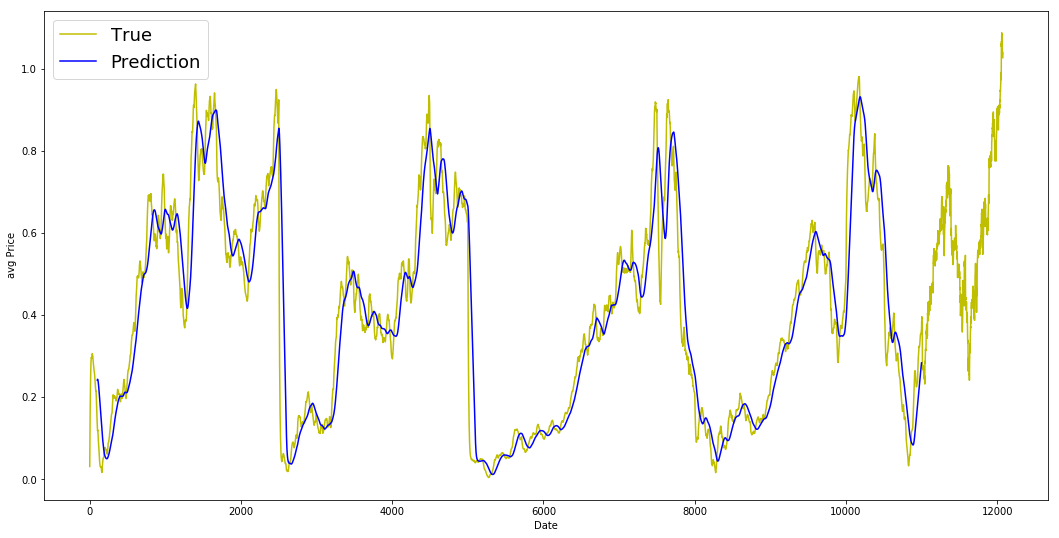

In [55]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_avg_data,color='y',label='True')
plt.plot(range(window_size,N),_avg_pred,color='b',label='Prediction')
plt.xlabel('Date')
plt.ylabel('avg Price')
plt.legend(fontsize=18)
plt.show()

Hey there, this piece of code makes a picture thats 18 inches by 9 inches. Then, it draws a line in yellow to represent the average data and names it True. After that, it draws another line in blue for the predicted average data and names it Prediction. Next, it puts labels on the x-axis for Date and the y-axis for Average Price. A legend is added with a font size of 18 and finally, the picture is shown. Basically, this code helps us see and compare the actual and predicted average data on a graph.

**WOW! IT WORKED! COMPARE THIS WITH THE NORMALIZTION TECHNIQUE USED IN THE PREVIOUS NOTEBOOK COMBINED WITH THE SIMPLE AVERAGING STRATERGY. WE GET A GREAT 1ST** **PREDICTION!**

Ref: https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

**Now lets Exponential Moving Average similar to what we had tried before.**

**Exponential Moving Average**

**'We are using EMA to calculate the next prediction step.**'

**It's given by the formula:**

**xt+1 = EMAt = γ × EMAt-1 + (1-γ) xt where EMA0 = 0 and EMA is the exponential moving average value you maintain over time.**

**This formula helps to find prediction in t+1 step ie one step prediction. Because you take only a very small fraction of the most recent, it allows to preserve much older values you saw very early in the average. See how good this looks when used to predict one-step ahead below.**



In [56]:
window_size = 100
N = train.size
mse_err = []
_avg_predictions_run = []
_avg_x_run = []



running_mean = 0.0 #the mean tat is calculates
_avg_predictions_run.append(running_mean) 

decay = 0.5 # use this to average the running mean again; 

for idx1 in range(1,N): #range from 1 to N-1
     
    running_mean = running_mean*decay + (1.0-decay)*train[idx1-1] #the remaining prob multiplied by the train sets data points
    _avg_predictions_run.append(running_mean)
    mse_err.append((_avg_predictions_run[-1]-train[idx1])**2) #make mse error with the help of train set
    _avg_x_run.append(date) #append the dates into the list

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_err))) #Calculate MSE

MSE error for EMA averaging: 0.00003


The following code calculates the average and MSE Mean Squared Error values for a group of data points. First, it sets the window size to 100, which will be used in the calculation. Then, it determines the size of the training set and creates empty lists to store the MSE error, average predictions, and average x values. The initial running mean is set to 0.0 and stored in the list _avg_predictions. The decay value is then set to 0.5, which is used in the calculation of the average running mean. The code then loops through the training set from index 1 to N-1. Within the loop, the running mean is multiplied by the decay value and added to the data point at index idx1-1, which is the remaining probability multiplied by the data points. The updated running mean is appended to the list _avg_predictions. At the same time, the MSE error is calculated by subtracting the current running mean from the data point at index idx1, squaring the difference, and adding it to the mse_err list. The current date is also added to the list _avg_x. Finally, the code displays the MSE error for EMA Exponential Moving Average averaging by taking the average of the total MSE error.

**MSE is great for EMA much better than simple average**

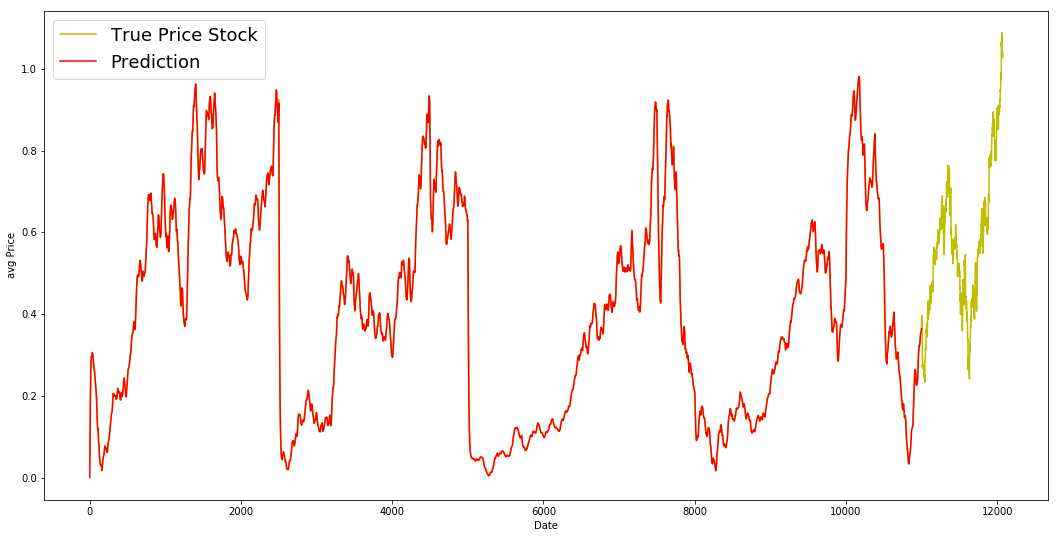

In [57]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_avg_data,color='y',label='True Price Stock')
plt.plot(range(0,N),_avg_predictions_run,color='r', label='Prediction')
plt.xlabel('Date')
plt.ylabel('avg Price')
plt.legend(fontsize=18)
plt.show()

This program will make a picture or chart thats 18 inches wide and 9 inches tall. Itll draw two lines on the picture, one for the overall data and another for the expected data, each with a different color. The horizontal line shows the date, while the vertical line shows the average cost. The picture will also have a key to explain which line is for which information. Then, the picture will show up on the screen.

**EMA is a great model for this dataset. Ideally the pattern of the True data should have been followed in the prediction model.** 

**We coded  from range to 1 to N-1 and put all the averaged values in the running mean. We used dense as 0.5 and then multiply it with the running average.** 

**Have a good read at bellow reference**

**Let's move on to LSTM**

ref:https://traderhq.com/moving-average-trading-strategies-do-they-work/

# LSTM

**Steps in LSTM:**

**1. Generate data so that stock price movements can be predicted**

**2. Augument data**

**3. Define Hyperparameters**

**'4. Make of Input and Output**

**5. Define Parameters of the LSTM and Regression Layer**

**6. Find LSTM Ouptut**

**7. Get final prediction from logistic regression layer'**

**8. Calculate loss and Optimixer**

**9. Train the LSTM model**

**10. Calculate predictions and plot it**

# 1 : Generate the stock price movements to input into LSTM 

The below method generates data and puts it in form of batches of the size of the batch size:
1. generate data and labels
2. generate simple full length data and labels and make an array for indices using closing prices
3. use this generated rolled out batches as input for LSTM 
4. the input will be the data and output will be the labels based on the prices

Logic: 
1. Create a batch size for the sequence of data that we have
2. Use this batch size on the seq and keep rolling out ie converting the data into small batches of the batch size
3. Put all this in a for loop in unroll method and roll out all the batches
4. Keep the input as data and the output as labels

Ref: https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/

In [58]:
class Generator(object):   
    
    def __init__(self,prices,batch_size,num_unroll): #helps to generate data 
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next(self):   #which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. 
        
        batch_data = np.zeros((self._batch_size),dtype=np.float32)  #Then each batch of input data will have a corresponding output batch of data.
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):   #create batches 
            if self._cursor[b]+1>=self._prices_length:
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll(self):   #roll out the batches generated in form of data and labels 
            
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self): #get prices length 
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))
        


dg = Generator(train,5,5)
u_data, u_labels = dg.unroll()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)




Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.11098009 0.6848606  0.83294916 0.33355275 0.12106793]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.132895   0.6848606  0.833369   0.33421066 0.12192084]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.11946969]

	Output: [0.132895   0.6848606  0.833141   0.33355275 0.12158521]


Unrolled index 3
	Inputs:  [0.11098009 0.6858036  0.83294916 0.33219692 0.12106793]

	Output: [0.17132245 0.6820074  0.833369   0.33355275 0.12230608]


Unrolled index 4
	Inputs:  [0.132895   0.6848606  0.833369   0.33355275 0.12158521]

	Output: [0.17132245 0.6836884  0.83387965 0.33650374 0.12358698]


The beginning of the code forms a group called Generator which is used to produce information for a set of prices. The __init__ function establishes the initial preferences, such as the prices, amount of data in each batch, and number of consecutive groups batches of information. The following function is used to display a set of num_unrollings batches of input information that are obtained in order, where each batch has a size of [batch_size, 1]. This is done by making an array of zeroes with the size of batch_size and filling it with values from the prices group. In the same way, the function also produces an array of zeroes for the corresponding output batch of information. The for loop in the next function forms batches of information by randomly choosing a section from the prices group and completing the batch_data with the values from that section. The batch_labels array is also filled with the corresponding values from the prices group, one step ahead. This pattern is repeated for each batch by updating the cursor variable. The unroll function performs the batches that are produced in the form of information and labels. It creates two empty lists to save the unrolled info and labels. The for loop goes through the num_unrollings and calls the following function to obtain the batch info and label. Then, these are added to the unroll info and label lists and given back in the end. The reset_indices function is used to return the cursor indices to a random position within the prices array. This ensures that the batches are randomly chosen each time the code is run. Lastly, an example of the Generator group is made with the given preferences and the unroll function is used to obtain the unrolled info and labels. This data is then published for each step.

# 2: Tweaking Hyperparameters

Let's tweak hyperparameters so we get better results for the neural net. 

D is the dimensionality which is 1. We have a 1d input and will get a simila output

num_unrollings deals with the BPTT of the net. It helps to tune the net by looking back that many layers and tuning weights

batchsize is how many datapoints are taken in a batch 

num_nodes is the number of nodes in each cell and layers is the length of theses number of nodes

Have a good look at the tensorflow docx

Ref : https://www.tensorflow.org/api_docs/python/tf/layers/Dense


In [0]:
D = 1 # Dimensionality of the data. Since our data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

This program sets up and assigns the values for the variables num_nodes and dropout. Firstly, it creates and sets five variables: D, num_unrollings, batch_size, num_nodes, and dropout, which will be used for future calculations. After that, it resets the graph with the command tf.reset_default_graph, which is important in case the program is run multiple times. This ensures that the numbers and equations are reset before each run. Next, it establishes the array for num_nodes with three numbers representing the amount of hidden nodes in each layer of the deep LSTM stack it will utilize. The following line uses the len function to calculate the total layers based on the num_nodes array. Lastly, the code assigns a value to the dropout variable, which randomly turns off neurons during training in order to avoid overfitting. Together, this program sets up and initializes all the necessary variables for the upcoming calculations.

**SPLIT THE TRAIN INTO INPUT AND OUTPUT AND DEFINE THEM. DECLARE DEMENSIONALITY OF THE TRAIN. INPUT IS 1 AND OUTPUT IS 1. BATCHSIZE IS A 1D TUPLE. SHAPE GIVEN TO LSTM IS [(BATCHSIZE), DIM]  WHICH IS 3 FIELDS**

In [0]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))


This code is creating new lists called train_inputs and train_outputs that do not contain any data at the moment. To make things more clear, a for loop is being used to go through a certain number of steps, and for each step a placeholder is made. A placeholder is like a spot where you can put data, kind of like a fill-in-the-blank. Each placeholder is given a name that is different from the others, and is based on the number of the step that its being made for. This process is then repeated for train_outputs, but the placeholder that is made here is shaped differently. At the end of the for loop, the two lists now have placeholders for all the data that will be used during training. These placeholders will be filled with actual data during the training process.

**DECLARE A SINGLE LSTM CELL USE TENSORFLOW DOCUMENTATION**

In [0]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

This program builds a special kind of computer network called a neural network. The network uses a type of cell called LSTM Long Short-Term Memory to work. First, the program makes a list of LSTM cells. Each cell has a certain number of parts, and their starting values are set with the Xavier method. This happens for all the layers in the network. Then, a new list is made by wrapping each LSTM cell with a DropoutWrapper. This helps the network learn better by randomly dropping some parts with a certain chance. The next step is to make one big cell called a MultiRNNCell. This cell has many of the LSTM cells from before inside of it. This is done for both the list with dropout and the one without dropout. After that, the program creates two things called w and b, which stand for the parts that control the network. w starts with the Xavier method, and b is made with random numbers between -0.1 and 0.1. Later, these things will help the network learn how the input information is connected to the output information.

**THE NEXT STEPS ARE BASICALLY CREATING TRANSFORMATION, CALCULATING LOSS AND DEFINING LOSS AND THEN FINALLY TRAIN THE LSTM CODE CAN BE FOUND IN BELOW TENSORFLOW LINKS**

Code:

https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn

https://www.tensorflow.org/api_docs/python/tf/train/Optimizer

https://www.tensorflow.org/api_docs/python/tf/reshape

https://www.tensorflow.org/api_docs/python/tf/control_dependencies



In [0]:
# Create cell state and hidden state variables to maintain the state of the LSTM
a1, b1 = [],[]
initial_state = []
for li in range(n_layers):
  a1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  b1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(a1[li], b1[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. 
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

This piece of code is organizing and working with necessary elements for utilizing a LSTM Long Short-Term Memory neural network. To start, two lists, a1 and b1, are made to hold the cell state and hidden state of the LSTM. These states will be updated and maintained as the network is trained. A special data structure called LSTMStateTuple is also made to store and manage the cell and hidden states. The initial state is a combination of the cell and hidden states from the lists a1 and b1. The next part is creating a tensor called all_inputs, which is a combination of the training inputs. The dynamic_rnn function requires a specific format for the input, so this tensor is crucial. The function is then called, with the type of cell being used a multi-cell LSTM, the input data, the initial state, and other details. This function carries out various tasks like training and updating the cell and hidden states, and producing a tensor with the networks outputs. This output tensor is reshaped and altered to match the desired format, and then separated into different tensors based on the number of training steps. This will come in handy while teaching the network, as each unrolling step represents a piece of the training data. In summary, this code sets up and organizes all the essential elements and data structures needed for working with an LSTM network, and ultimately generates the output tensors for training.

In [63]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps
print('Loss for the input train while converting prices into movements')
loss = 0.0
with tf.control_dependencies([tf.assign(a1[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(b1[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ =  tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))



Loss for the input train while converting prices into movements
Learning rate decay operations
TF Optimization operations


First, the program kindly informs the user about what its doing. Then, it sets the loss to 0.0. Afterwards, it uses a special function to assign values to a1 and b1 from the main state variable. This happens for each layer of the neural network. Then, it goes through a loop a certain number of times, calculating the loss at each step using a specific formula. After that, a message appears about how the learning rate is being adjusted. To keep track of the progress, a global step is created and incremented each time. A placeholder is also made for the learning rate, along with a minimum rate. Using a special formula, the code determines the learning rate using the highest value possible. This learning rate is then used in the optimization process, where an AdamOptimizer is used to calculate the gradients and limit them to a maximum value of 5.0. Lastly, these gradients are applied to the training using the apply_gradients function.

**MAKE SAMPLE PREDICTIONS FOR THE ABOVE MODEL:**

Check code out for https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn so that we can get a sample output and state . Then run a model on this code https://www.tensorflow.org/api_docs/python/tf/nn/xw_plus_b and predict

I also took help of this github repo: 
https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction/blob/master/core/model.py

In [64]:
 print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


This piece of code begins by displaying a message that informs us of the TensorFlow functions involved in predicting. After that, a space is created in the TensorFlow for a one-dimensional array of numbers with decimal points shape=[1,D]. This allows for inputting data samples during the prediction process. The next part of the code deals with setting up a state for the prediction stage, called Long-Short Term Memory LSTM. This helps to keep track of important information during predictions. A loop is used to go through the specified number of layers n_layers and for each layer, a list is created to store the sample values for the cell and hidden states sample_c and sample_h. These lists are initially filled with zeros with a size of 1 x num_nodes[li], where li stands for the layer index. Once the lists are ready, another list called initial_sample_state is created to hold the LSTMStateTuple for each layer. This is done by using the function LSTMStateTuple and passing in the current layers sample_c and sample_h values. This tuple represents the previous cell and hidden states for the current layer. Next, a set of operations is defined using the function tf.group. This set is used to reset the sample states to all zeros after making a prediction. The first set of operations in this set uses a loop to assign all the elements in the sample_c list to zeros with dimensions of 1 x num_nodes[li], where li is the layer index. This is repeated for the sample_h list. With the sample states all reset to zeros, the next step is to run the LSTM with the sample inputs using the function dynamic_rnn from TensorFlow. This function takes in the LSTM cell multi_cell, the sample inputs, which have been expanded to have an extra dimension, and the initial state for each layer. The parameter time_major is set to True, which shows that the inputs provided are in the shape [time_steps, batch_size, input_size]. The output of this function is a tuple that contains the outputs and states for the predictions. The final step in this code is to specify that we want to update the sample states after a prediction has been made. This is done using the function tf.control_dependencies, which states the operations that must be completed before the sample_prediction can be evaluated. These operations include assigning the sample_c and sample_h lists using the sample_state values. Lastly, the sample_prediction is defined using the operation XW plus B on the rearranged sample_outputs using the weights w and the bias b matrices. The print statement is used to let us know that the code has finished running.

**CREATE A TRAINING MODEL, THEN VALIDATE MODEL AND TEST IT AND PREDICT IT. AGAIN CODE IS FOUND IN TENSORFLOW DOCCUMENTATION**

In [65]:
epochs = 50
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = Generator(train,batch_size,num_unrollings) 

x_axis_seq = []

# Points you start our test predictions from
test_points_seq = np.arange(11000,12000,50).tolist() 

for ep in range(epochs):       
    
    #Training
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)
        
        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
    
    #Validation
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))
      
      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))
      
      train_mse_ot.append(average_loss)
            
      average_loss = 0 # reset loss
      
      predictions_seq = []
      
      mse_test_loss_seq = []
      
      #Updating State and Making Predicitons
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []
        
        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]
        
        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_avg_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)
        
        feed_dict = {}
        
        current_price = all_avg_data[w_i-1]
        
        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
        
        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)
        
          our_predictions.append(np.asscalar(pred))
        
          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_avg_data[w_i+pred_i])**2
        
        session.run(reset_sample_states)
        
        predictions_seq.append(np.array(our_predictions))
        
        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)
        
        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)
        
      current_test_mse = np.mean(mse_test_loss_seq)
      
      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0
      
      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
      
      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 1.606525
	Test MSE: 0.01014
	Finished Predictions
Average loss at step 2: 0.176963
	Test MSE: 0.00842
	Finished Predictions
Average loss at step 3: 0.080844
	Test MSE: 0.00311
	Finished Predictions
Average loss at step 4: 0.066810
	Test MSE: 0.00270
	Finished Predictions
Average loss at step 5: 0.055696
	Test MSE: 0.00270
	Finished Predictions
Average loss at step 6: 0.052513
	Test MSE: 0.00345
	Finished Predictions
Average loss at step 7: 0.052445
	Test MSE: 0.00243
	Finished Predictions
Average loss at step 8: 0.046246
	Test MSE: 0.00242
	Finished Predictions
Average loss at step 9: 0.050750
	Test MSE: 0.00241
	Finished Predictions
Average loss at step 10: 0.043253
	Test MSE: 0.00240
	Finished Predictions
Average loss at step 11: 0.040725
	Test MSE: 0.00273
	Finished Predictions
Average loss at step 12: 0.039212
	Test MSE: 0.00238
	Finished Predictions
Average loss at step 13: 0.036308
	Test MSE: 0.00239
	Finished Predictions
Average loss at step 1

To begin, we set the number of times the model will learn epochs to 50 and decide how often we want to test its predictions valid_summary. We also determine how many steps to predict at once n_predict_once, the length of our training data train_seq_length, and create empty lists to keep track of train and test losses, as well as our predictions. Our goal is to create a successful model, so we start by opening a Tensorflow session and setting up variables for a decreasing learning rate. Next, we use our training data to create a data generator and make two lists for the x-axis and test points. Then, we enter a loop that will run for the number of epochs we specified. In this loop, we first train the model by generating a new set of data and then use it to update our models performance. After completing this training, the code checks if its time to evaluate the model. If so, it calculates the average loss and prints it. Then, it resets the average loss and creates empty lists for our predictions and test loss. Moving on, we enter another loop to make predictions. For each prediction, we give the model previously recorded stock price data and it predicts the stock price for the next time step. These predicted values are then stored in our predictions list and the test loss is calculated. As the loop continues, we check if its the first time were evaluating the model, and if so, we add the x-axis values. Then, we evaluate the current mean squared error MSE and compare it to the previous MSE. If the current MSE is higher, we decrease the learning rate to improve the models performance. Lastly, we print the current MSE and add the predictions from this epoch to our overall predictions list. This loop continues for the specified number of epochs and the final predictions are stored in the list predictions_over_time.

**PLOT TENSORFLOW PREDICTIONS PLOT**

**Code reference: https://www.tensorflow.org/beta/tutorials/text/time_series**

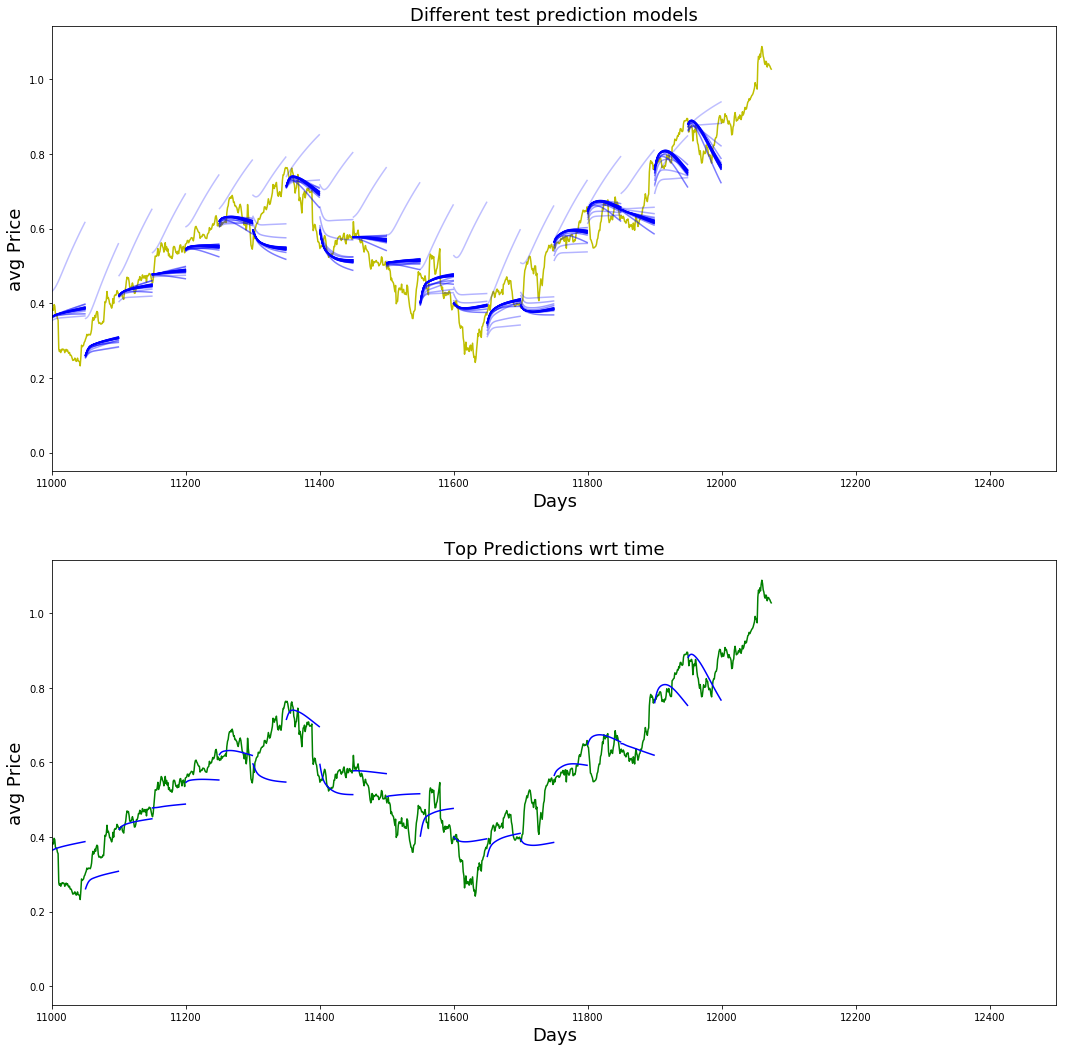

In [66]:
best_prediction_epoch = 49 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_avg_data,color='y',label='data')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='b',alpha=alpha[p_i],label='stock price movement change')

plt.title('Different test prediction models',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_avg_data,color='g',label='predictions')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='b',label='change in price movement')
    
plt.title('Top Predictions wrt time',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()

This program helps us create graphs to see how accurate our stock price predictions are over a certain time period. The first part assigns the most accurate prediction timeframe to a variable called best_prediction_epoch. Then, we create a graph with dimensions of 18x18 and add two smaller graphs to it using the subplot function. The first graph shows the data points from our dataset, while the second one shows the predictions made by our model. For the first graph, we use a line graph to show the average stock price over time. The color yellow is used for this line and it is labeled as data. Next, we use a loop to plot the predictions made by our model over time. We get the x and y values from the predictions_over_time variable, which has the predicted stock prices at different intervals. To make it easier to see the changes in predictions over time, we adjust the transparency of the lines using the variables start_alpha and alpha. Older predictions have lower transparency, while newer ones have higher transparency. In the second graph, we follow the same steps to plot the predictions, but only for the best prediction timeframe. This is done by using the best_prediction_epoch variable to access the predictions from that specific timeframe. The lines are plotted in green and labeled as predictions. This graph allows us to closely compare the predictions from the best timeframe with the actual data. Finally, we use the subplot function to arrange the two graphs in a 2x1 grid and adjust the x and y limits to focus on a specific range of data. The final result is shown using the show function. In summary, this code helps us visually compare our models predictions with the actual data and understand how they change over time.

**CONCLUSIONS AND INTERPRETATION OF THE ABOVE PLOT:**

**NOTICE THAT WE PREDICT STOCK PRICE MOVEMENTS AND NOT STOCK PRICE OVER TIME**

**THE BLUE TICKS INDICATE CHANGES IN THE STOCK PRICE MOVEMENT IE THIER MOMENTUM**

**THIS IS CALCULATED BY SPLITTING THE UNROLL SEQUENCE GENERATOR**

**THE Y AXIS IS BETWEEN 0 AND 1 AND ALL PRICE MOVEMENTS ARE BETWEEN THEM**

**ANYTHING ABOVE .8 AND CLOSE TO 1 IS A GOOD VALUE**

**GENERALLY OVER A LONGER TIME LSTM CAN DETECT STOCK PRICE MOVEMENTS MUCH BETTER THAN IT CAN DETECT STOCK PRICES EASILY AS SEEN**

 



**Make a generator sequence again**

In [0]:
class Generator(object):   
    
    def __init__(self,prices,batch_size,num_unroll): #helps to generate data 
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next(self):   #which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. 
        
        batch_data = np.zeros((self._batch_size),dtype=np.float32)  #Then each batch of input data will have a corresponding output batch of data.
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):   #create batches 
            if self._cursor[b]+1>=self._prices_length:
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll(self):   #roll out the batches generated in form of data and labels 
            
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self): #get prices length 
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))
        


dg = Generator(train,5,5)
u_data, u_labels = dg.unroll()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)




Unrolled index 0
	Inputs:  [0.31437907 0.68251073 0.8827639  0.34908384 0.12648556]

	Output: [0.32384238 0.67637324 0.8365174  0.34575522 0.13545202]


Unrolled index 1
	Inputs:  [0.32384238 0.67637324 0.87069887 0.35307965 0.1345414 ]

	Output: [0.33012915 0.67637324 0.8365174  0.34492955 0.1340011 ]


Unrolled index 2
	Inputs:  [0.32372627 0.6668353  0.8365174  0.35061213 0.1340011 ]

	Output: [0.33012915 0.6731387  0.831089   0.34013176 0.1262407 ]


Unrolled index 3
	Inputs:  [0.32695258 0.67637324 0.83310276 0.34492955 0.13545202]

	Output: [0.33012915 0.6731387  0.83714783 0.35714167 0.12494157]


Unrolled index 4
	Inputs:  [0.33012915 0.67637324 0.83714783 0.34575522 0.1262407 ]

	Output: [0.3396588  0.6731387  0.8405274  0.35714167 0.12577325]


This piece of code is designed to produce data for a neural network. It contains a class called Generator that has three properties: prices, batch size, and num_unroll. The prices property stores a list of prices, the batch size determines the input data size for each batch, and the num_unroll decides the number of batches generated in sequence. The __init__ function is used to set up the Generator class by taking in the prices, batch size, and num_unroll and assigning them to their respective properties. It also calculates the number of segments based on the prices, batch size, and num_unroll. The cursor property keeps track of the current position in the prices list. The next function generates a batch of input data and its corresponding output data. It starts by creating two arrays of zeros: one for the batch data, and the other for the labels. Then, it goes through the batch size and randomly selects data points from the prices list to create the batches. If the cursor reaches the end of the prices list, it goes back to a random position within the range of the batch. The batch labels are chosen by randomly selecting a data point from 1 to 5 within the next data points in the prices list. This process continues until the batch size is reached. After that, the batch data and labels are returned. The unroll function creates the batches of data and labels in a continuous format by calling the next function and adding them to two arrays: unroll_data and unroll_labels. These arrays hold all the batches generated in sequence. Finally, the reset_indices function resets the cursor to a random position within the prices list. This is done before generating each batch to prevent any bias towards the end of the prices list. In summary, this code generates data for a neural network by creating batches with both input data and corresponding output data. These batches are created in sequence and can be accessed in a continuous format using the unroll function. By resetting the cursor, the data is not biased towards the end of the prices list.

**RUN ANOTHER MODEL CHANGING HYPERPARAMETER AND EPOCH**



**Change hyperparamters**

In [0]:
D = 1 # Dimensionality of the data. Since our data is 1-D this would be 1
num_unrollings = 75
batch_size = 300
num_nodes = [250,250,175] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

This piece of code creates a special type of computer program called a neural network, using a deep technology called LSTM. Its set up to work with data that has one dimension, meaning its only measured in one direction. The data will be organized in groups of 300, with 75 steps in each group. The LSTM has different layers, and in each one there are 250, 250, and 175 hidden parts respectively. The number of layers is determined by looking at the num_nodes list, which in this case has 3 elements. We also make sure not to overwork the program by having a safety measure of 0.2. Lastly, the tf.reset_default_graph function gets things ready for us to start building our program all over again if needed.

In [0]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))


This program helps make a list of empty spots to hold data that will be used in chunks to train models for time-based information. It starts by making empty groups to hold the incoming and outgoing information separately. Then, using a loop, it goes through the set number of time chunks and adds a spot for each one to the appropriate group. These spots are defined using the TensorFlow library and specify the type of data, shape, and name for each spot. This makes it possible to give the model data at each time chunk during training. The spots are divided into input and output to make sure the right data is matched for training. In summary, this code creates the necessary spots to give input data to a time-based model for training.

In [0]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

This piece of code is used to set up and start using LSTM cells in a recurrent neural network. It first makes a list called lstm_cells by looping through the number of layers in the network. Then, it creates each LSTM cell within the loop using tf.contrib.rnn.LSTMCell. The cells number of hidden units is set and the state is made into a tuple. Additionally, it uses tf.contrib.layers.xavier_initializer to set the cells weights. Another list, drop_lstm_cells, is then made through another loop. This loop goes through the previously created LSTM cells and uses tf.contrib.rnn.DropoutWrapper to add a dropout layer to each cell. This layer minimizes overfitting by randomly omitting certain inputs and outputs during training. When all the cells are finished, a tf.contrib.rnn.MultiRNNCell combines the drop_lstm_cells list, creating one multi-layer LSTM cell. This final cell is used in the network. A separate multi-layer LSTM cell is also made without the dropout layer using the lstm_cells list. Next, two variables, w and b, are made with tf.get_variable. w is used to hold the weights for the output layer and is initialized by using tf.contrib.layers.xavier_initializer. b is used to store the bias and is also initialized with random values ranging from -0.1 to 0.1 using tf.random_uniform. In summary, this code sets up and prepares LSTM cells to be used in a recurrent neural network. It also includes a dropout layer to avoid overfitting and sets the initial weights and bias values for the output layer.

In [0]:
# Create cell state and hidden state variables to maintain the state of the LSTM
a1, b1 = [],[]
initial_state = []
for li in range(n_layers):
  a1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  b1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(a1[li], b1[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. 
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

This piece of code helps us keep track of the status of cells and hidden layers in a special type of neural network called LSTM. We use two variables, a1 and b1, to represent the cell state and hidden state in each layer of the LSTM. These variables are set to zero and cannot be changed during training. The code then rearranges the input data so that it can be used by the LSTM. It combines all the training inputs and adds a new dimension to account for the length of the sequence. This is important for the later step of using the dynamic_rnn function. This function takes in the LSTM, the prepared input, and the starting state, and returns a tuple containing the cell and hidden states for each layer. The outputs of this function are also organized in a specific way by combining the sequence length and batch size into one dimension. We then use weights and a bias term to process these outputs using the xw_plus_b function. Finally, the outputs are separated into their original format, with each one representing the result for a particular time step. This whole process readies the outputs to be used for further calculations or compared to the desired targets during training.

In [0]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps
print('Loss for the input train while converting prices into movements')
loss = 0.0
with tf.control_dependencies([tf.assign(a1[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(b1[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ =  tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))



Loss for the input train while converting prices into movements
Learning rate decay operations
TF Optimization operations


This computer program is designed to figure out how much we are losing when we change prices. It does this by adding up all the little mistakes for each group of numbers, and then adds them all together for all the times we did this. To make sure everything is done the right way, the program first gives values to two important things called a1 and b1, which we need for the math. Then, the learning speed gets slower as we do more steps using something called exponential decay. This helps us get better answers when we try to make things better. We use something called Adam to make the computer change the numbers and patterns in our brain program. To make sure the numbers dont get too big and get all out of control, we stop them at a number called 5.0. Then we use the Adam thing to finish up. This code is really important because it helps us teach our brain program to know how things move when prices change.

In [0]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)


Defining prediction related TF functions


This code contains various functions for predicting values. A message is printed to indicate that these functions are being defined. The input placeholder is then created, which is a one-dimensional array with D elements. Next, the initial state for the LSTM model is established, which includes empty variables for the cell state, hidden state, and a combination of initial states. These variables are marked as untrainable so they will not be changed during training. A different set of variables is created to reset the sample states using tf.assign. This function resets the cell and hidden states for each layer. Then, the outputs and state of the sample model are defined using the dynamic_rnn function from TensorFlow. This function takes in the multi_cell variable, sample inputs, initial states, and other arguments. With the use of tf.control_dependencies, the sample states are updated after each training batch. This is accomplished by assigning the values from the sample state to the previously created cell and hidden state variables. Finally, the code is able to predict values using the xw_plus_b function, which applies a linear transformation to the reshaped sample outputs using weight w and bias b values. The result is a single predicted value.

**Training with 100 epochs**

In [0]:
epochs = 100
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = Generator(train,batch_size,num_unrollings) 

x_axis_seq = []

# Points you start our test predictions from
test_points_seq = np.arange(11000,12000,50).tolist() 

for ep in range(epochs):       
    
    #Training
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)
        
        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
    
    #Validation
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))
      
      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))
      
      train_mse_ot.append(average_loss)
            
      average_loss = 0 # reset loss
      
      predictions_seq = []
      
      mse_test_loss_seq = []
      
      #Updating State and Making Predicitons
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []
        
        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]
        
        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_avg_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)
        
        feed_dict = {}
        
        current_price = all_avg_data[w_i-1]
        
        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
        
        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)
        
          our_predictions.append(np.asscalar(pred))
        
          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_avg_data[w_i+pred_i])**2
        
        session.run(reset_sample_states)
        
        predictions_seq.append(np.array(our_predictions))
        
        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)
        
        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)
        
      current_test_mse = np.mean(mse_test_loss_seq)
      
      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0
      
      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
      
      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 1.592642
	Test MSE: 0.00265
	Finished Predictions
Average loss at step 2: 0.147820
	Test MSE: 0.00486
	Finished Predictions
Average loss at step 3: 0.120285
	Test MSE: 0.00269
	Finished Predictions
Average loss at step 4: 0.117821
	Decreasing learning rate by 0.5
	Test MSE: 0.00275
	Finished Predictions
Average loss at step 5: 0.110326
	Test MSE: 0.00231
	Finished Predictions
Average loss at step 6: 0.093360
	Test MSE: 0.00260
	Finished Predictions
Average loss at step 7: 0.094030
	Test MSE: 0.00310
	Finished Predictions
Average loss at step 8: 0.094284
	Decreasing learning rate by 0.5
	Test MSE: 0.00246
	Finished Predictions
Average loss at step 9: 0.095949
	Test MSE: 0.00246
	Finished Predictions
Average loss at step 10: 0.085950
	Test MSE: 0.00279
	Finished Predictions
Average loss at step 11: 0.084883
	Decreasing learning rate by 0.5
	Test MSE: 0.00235
	Finished Predictions
Average loss at step 12: 0.092206
	Test MSE: 0.00257
	Finished Prediction

This program is created to build a neural network that learns from stock market information. The epochs, valid_summary, n_predict_once, train_seq_length, and train_mse_ot variables are used to adjust the models settings during training. To train the model, a data generator is utilized in order to create batches of data from the train information. The x_axis_seq and test_points_seq variables are responsible for selecting where the test predictions begin and end. As the model trains, the ep and step variables help to move through the data and update the weights using the backpropagation method. After each training round, there is a validation step that calculates the average loss for that round and updates the train_mse_ot variable accordingly. When its time to test the model, the code uses the current state to make predictions at specified points. The mse_test_loss variable calculates the mean squared error by comparing the predicted stock prices to the actual data. There is also a logic in place to gradually decrease the learning rate if the predicted stock prices do not show improvement over a certain number of steps. Finally, the code displays the mean squared error from the test and saves the models predictions for each round of training.

**Plot the predictions**

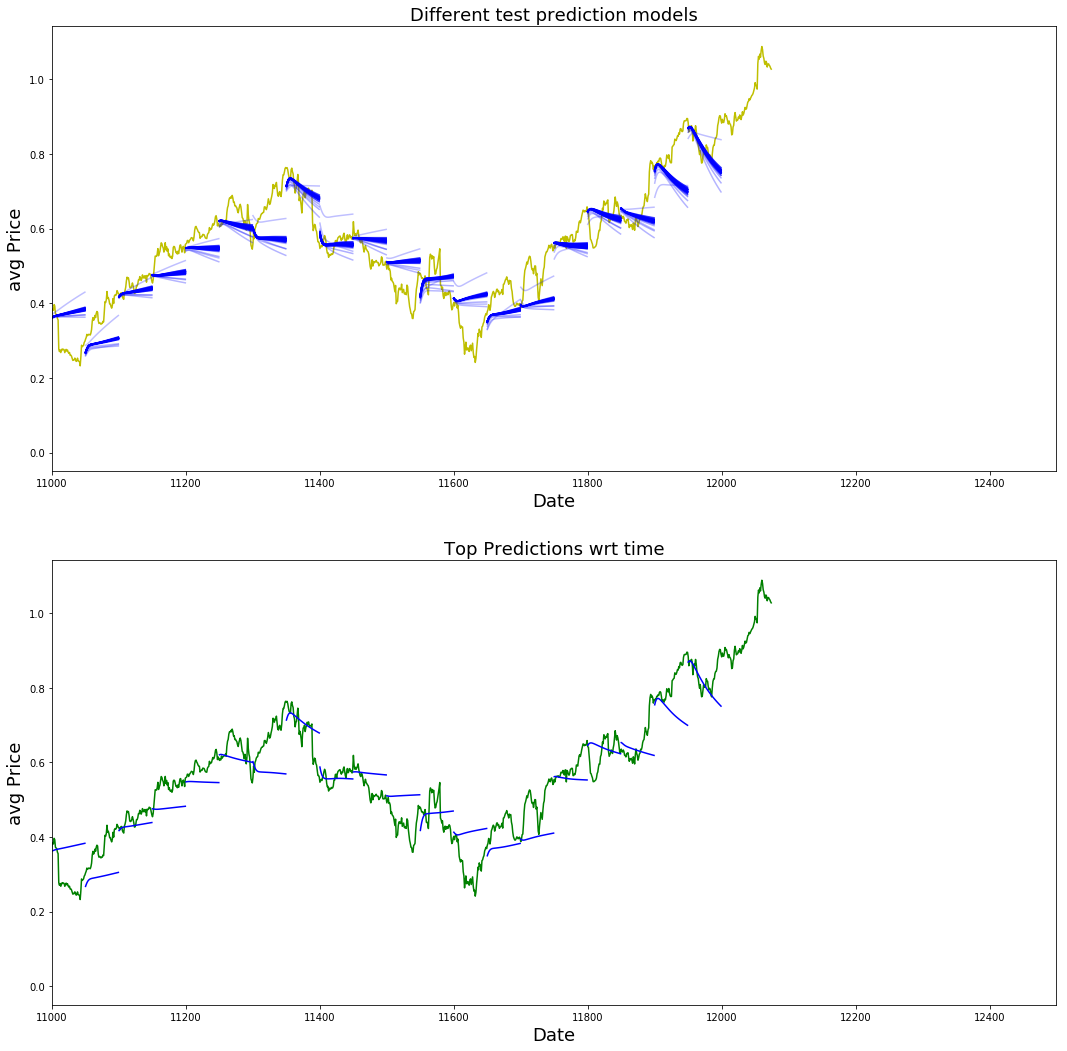

In [0]:
best_prediction_epoch = 49 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_avg_data,color='y')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='b',alpha=alpha[p_i])

plt.title('Different test prediction models',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_avg_data,color='g')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='b')
    
plt.title('Top Predictions wrt time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()

First, we set the variable best_prediction_epoch to have a value of 49. Then, we create a graph with a size of 18x18 and add two smaller graphs, one on top of the other, using the subplot function in matplotlib. The first graph shows the average data in yellow. Next, we go through a range of values with a specific step and plot the predicted values over time for each of these values using various colors and transparency levels. The further back in time the prediction is, the more transparent it will be compared to more recent ones. This is all done in a loop within a loop. We also give this graph a title, label the x and y axes, and set a limit for the x axis. In the second graph, we plot the average data in green. Then, we use a loop to plot the predictions for the best prediction epoch which we set earlier on top of the green line using the same color. Again, we add a title, label the axes, and set a limit for the x axis. Finally, we show the figure so that we can see all the plotted values. Essentially, this code helps us to visualize and compare the predictions over time, specifically highlighting the best one.

# **CONCLUSION:**

**Looks like when we perform hyperparameter tuning, generate a data sequence for price prediction of data instead of simply feeding prices into the LSTM network the LSTM model gives good results!**

**The model isn't underfit or overfit**

**It becomes easy to predict the movement of prices by using batch sizes and then normalization**

**After reading a few more papers I realised that trying LSTMs out with sentimental analysis- ie news feed or twitter sentiments give a better prediction. Some of the papers are listed below.**

**Papers that talk about stock market prediction with sentimenal analysis**:





1.   Stock Movement Prediction from Tweets and Historical Prices by Yumo Xu and Shay B. Cohen 

2.   Stock Prediction Using Twitter Sentiment Analysis by Anshul Mittal and Arpit Goel Stanford University

3. Sentiment Analysis for Effective Stock Market Prediction by Shri Bharthi and Angelina Geetha



This bit of code is making a fancy thing named makeNumber. It takes in a group of words and gives back a different group with only numbers in it. To do this, the fancy thing starts with an empty group named newString. Then, it goes through each letter in the group of words using a special method. While its going through, it checks if the letter is a number or not using a special check. If the letter is a number, it gets added to the end of the newString. Finally, when its checked all the letters, the fancy thing gives back the newString, which now only has numbers from the original group of words.